In [78]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import koreanize_matplotlib
import missingno as msno # 결측치 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.descriptivestats as statsd

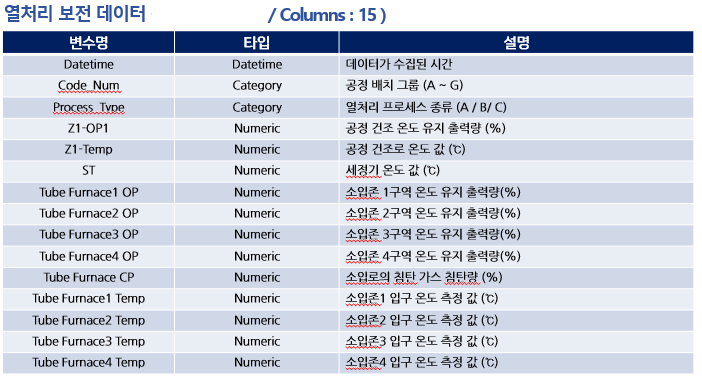

In [3]:
df = pd.read_csv("실습 파일/08_Data.csv")
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93043 entries, 0 to 93042
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code_Num            93043 non-null  object 
 1   Datetime            93043 non-null  object 
 2   Process_Type        93043 non-null  object 
 3   ST                  93028 non-null  float64
 4   Tube Furnace CP     93043 non-null  float64
 5   Tube Furnace1 OP    92864 non-null  float64
 6   Tube Furnace1 Temp  93039 non-null  float64
 7   Tube Furnace2 OP    93043 non-null  float64
 8   Tube Furnace2 Temp  93041 non-null  float64
 9   Tube Furnace3 OP    93043 non-null  float64
 10  Tube Furnace3 Temp  93036 non-null  float64
 11  Tube Furnace4 OP    93043 non-null  float64
 12  Tube Furnace4 Temp  93038 non-null  float64
 13  Z1-OP1              93043 non-null  float64
 14  Z1-OP2              93043 non-null  float64
 15  Z1-Temp             93028 non-null  float64
dtypes: f

In [7]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df

,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp
0,GroupA,2022-01-03 11:22:00,OP-A,NaN,0.450497,73.527404,NaN,59.989422,868.759544,52.249481,NaN,72.134908,NaN,74.255730,76.879748,NaN
1,GroupA,2022-01-03 11:22:00,OP-A,NaN,0.457370,79.149174,878.116929,62.027232,883.821264,50.617109,890.740760,71.245235,894.430606,66.323571,71.297720,NaN
2,GroupA,2022-01-03 11:22:00,OP-A,68.724636,0.454914,78.946336,866.441979,62.235532,882.850031,52.218350,864.373065,72.705558,893.530501,72.909936,71.579322,99.614201
3,GroupA,2022-01-03 11:22:00,OP-A,69.161116,0.456540,78.445719,876.350472,61.608260,906.208463,52.863552,891.107865,73.975640,896.347636,68.754355,73.537496,99.376221
4,GroupA,2022-01-03 11:22:00,OP-C,69.181098,0.460100,76.673808,903.587677,61.589311,867.215131,52.297196,893.206883,71.887865,871.594283,69.692302,72.461153,99.809053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93038,GroupF,2022-01-07 06:17:00,OP-C,71.033373,0.452082,100.134826,872.637943,46.360373,903.099390,49.074962,907.047411,69.737301,885.226007,79.388710,75.183327,100.349989
93039,GroupF,2022-01-07 06:17:00,OP-C,70.279919,0.454568,100.495863,859.093360,47.415839,879.563033,48.813327,868.128755,68.664392,907.965662,74.321059,75.029649,100.779761
93040,GroupF,2022-01-07 06:17:00,OP-C,70.743509,0.449965,100.043239,877.629751,46.868824,878.300413,49.373930,871.801850,69.552292,883.993894,71.790816,76.608828,100.050607
93041,GroupF,2022-01-07 06:17:00,OP-C,70.135205,0.454477,100.663784,903.544591,46.148800,900.809104,48.564558,880.085060,68.732966,889.400098,65.348224,72.388889,100.295380



## 다변수 검정
정규분포를 따르는 연속형 자료의 집단 간 평균 비교

In [18]:
# 각 Code_Num (공정배치그룹)별 Z1-OP1(공정 건조 온도 출력량)이 정규분포를 따르는가?
idx = sorted(df['Code_Num'].unique())
idx

['GroupA', 'GroupB', 'GroupC', 'GroupD', 'GroupE', 'GroupF']

In [19]:
# 귀무가설 : 정규분포 따른다. 대립가설 : 정규분포 따르지 않는다
for i in idx:
    print(f"{i} 정규분포 : ", stats.normaltest(df[df['Code_Num']==i]['Z1-OP1']))
    
# 모든 집단이 정규성을 따른다고 볼 수 있음
# 배치 그룹별로 Z1-OP1 데이터가 통게적으로 유의미한 수준에서 정규분포를 따른다

GroupA 정규분포 :  NormaltestResult(statistic=3.671411795679153, pvalue=0.1595008706997435)
GroupB 정규분포 :  NormaltestResult(statistic=1.6496091628704512, pvalue=0.4383206400865056)
GroupC 정규분포 :  NormaltestResult(statistic=2.8668515001589796, pvalue=0.23849051231867696)
GroupD 정규분포 :  NormaltestResult(statistic=0.45941327604808013, pvalue=0.7947667226435516)
GroupE 정규분포 :  NormaltestResult(statistic=3.1395858023119314, pvalue=0.20808827273562336)
GroupF 정규분포 :  NormaltestResult(statistic=0.37943212967748347, pvalue=0.8271939700559496)


### 두 집단의 등분산성 확인
* 귀무가설 : 두 집단의 연속형 자료는 서로 분산이 같다고 볼 수 있다
* 대립가설 : 두 집단의 연속혀 자료는 서로 분산이 다르다고 볼 수 있다

### 바틀넷 검정 
두 개 이상의 독립적인 표본들의 분산이 서로 같은지 여부를 검정 

1. 검정 대상인 모든 표본들은 정규분포를 따라야 함
2. 표본들은 독립적이어야 함. 

만약 정규분포를 따르지 않으면, 레빈 검정 등 다른 검정 사용

In [22]:
A = df[df['Code_Num']=="GroupA"]['Z1-OP1']
B = df[df['Code_Num']=="GroupB"]['Z1-OP1']
C = df[df['Code_Num']=="GroupC"]['Z1-OP1']
D = df[df['Code_Num']=="GroupD"]['Z1-OP1']
E = df[df['Code_Num']=="GroupE"]['Z1-OP1']
F = df[df['Code_Num']=="GroupF"]['Z1-OP1']

stats.bartlett(A,B) # 두 집단의 분산이 동일하다고 볼 수 있다.

BartlettResult(statistic=2.420099118432249, pvalue=0.11978735084357492)

### 독립 두 표본 t-검정
평균이 서로 다른지 여부 검정
1. 두 표본은 독립적
2. 두 표본은 정규분포를 따라야한다 (큰 표본인 경우, 중심극한정리로 인해 가정 완화
3. 분산이 같은 경우 / 다른 경우가 있음

In [26]:
# A,B 등분산이면서 정규분포를 따르는 집단의 평균의 차이는 같다고 볼 수 있는가?
stats.ttest_ind(A,B, equal_var=True) # 평균이 서로 다르다고 볼 수 있음

TtestResult(statistic=-2.639322169676157, pvalue=0.008313441641397017, df=20639.0)

### 정규분포를 따르는 3개 이상의 집단의 평균 비교

### 일원-분산분석(One Way ANOVA)
3개 이상의 그룹 간 평균 차이가 통계적으로 유의미한지 검정
1. 각 그룹 데이터는 정규분포를 따라야 함
2. 각 그룹의 분산이 동일해야 함
3. 각 그룹의 표본은 독립적이어야 함

* 귀무가설 : 세 그룹이 평균이 같다고 볼 수 있다
* 대립가설 : 세 그룹이 평균이 다르다고 볼 수 있다

In [29]:
# 등분산성 확인 
stats.bartlett(A,B,C) # 세 집단의 분산이 동일하다고 볼 수 있다.

BartlettResult(statistic=2.5612111069197994, pvalue=0.2778689849710782)

In [30]:
stats.f_oneway(A,B,C) # 각 그룹의 평균이 다르다고 볼 수 있다.

F_onewayResult(statistic=3.475391313982237, pvalue=0.03095757071911052)

### 연속형 자료의 상관성 검정
연속형 자료 또한, 데이터의 정규성에 따라 가설검정의 방법이 달라짐

In [32]:
A = df['Z1-OP1']
B = df['Z1-OP2']

A.corr(B)

-0.002423403190979929

C:\Users\campus2H018\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


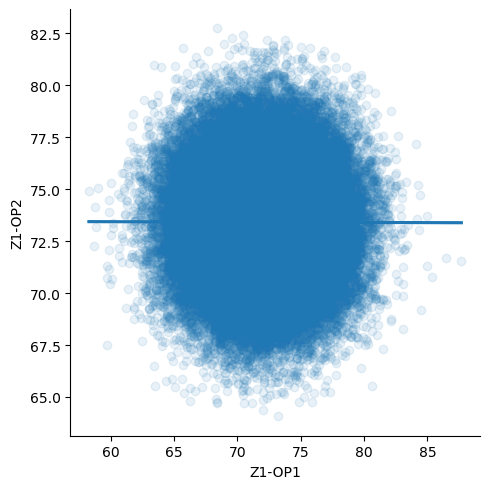

In [34]:
sns.lmplot(data=df, x="Z1-OP1", y="Z1-OP2",
          scatter_kws={'alpha':0.1})

In [36]:
stats.normaltest(A),stats.normaltest(B)

(NormaltestResult(statistic=2.18765496291767, pvalue=0.3349320908928943),
 NormaltestResult(statistic=1.1121501227551858, pvalue=0.573455429905634))

## 연속형 자료가 정규분포를 따르는 경우
* 귀무가설 : 두 연속형 자료는 서로 상관성이 없다
* 대립가설 : 두 연속형 자료는 서로 상관성이 있다


### 피어슨 상관계수
* 공분산을 각 변수의 표준편차의 곱으로 나누어 계산
* 선형 관계는 탐지 가능
* 비선형 관계가 있을 때는 피어슨으로 탐지되지 않을 수 있음
* x제곱의 그래프 형태로 나온다면, 초반에는 관계가 없어 보이지만, 뒤로 갈수록 올라가며 관계가 있음을 알 수 있는데, 피어슨은 이런 부분을 확인해줄 수 없음

p-value는 귀무가설의 확률이 우연히 발생할 확률

* 상관계수가 1, p-value가 0.05보다 크게 나오면?            
데이터 수가 엄청나게 적을 때는 희박한 확률로 나올 수 있음
p-value 기준으로 봐야함!


In [38]:
stats.pearsonr(A,B) # 두 집단의 상관성이 없다고 볼 수 있다.

PearsonRResult(statistic=-0.0024234031909799334, pvalue=0.4597851757502812)

## 두 연속형 자료가 정규분포를 따르지 않은 경우?
* 귀무가설 : 두 연속형 자료는 서로 상관성이 없다
* 대립가설 : 두 연속형 자료는 서로 상관성이 있다

In [40]:
df = df.dropna()
A = df['Tube Furnace CP'] #소입로의 가스 침탄량
B = df['ST'] # 세정기 온도값

stats.normaltest(A),stats.normaltest(B)

(NormaltestResult(statistic=45980.21679557492, pvalue=0.0),
 NormaltestResult(statistic=3427.6390518307962, pvalue=0.0))

C:\Users\campus2H018\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


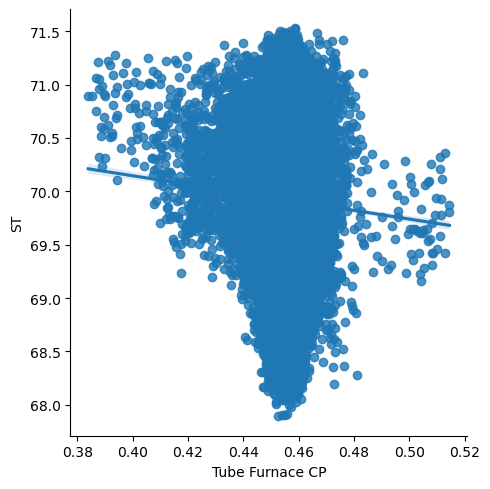

In [41]:
sns.lmplot(data=df, x='Tube Furnace CP', y='ST')

### 스피어만 순위 상관계수
* 두 변수 간의 상관성 검정
* 비선형도 적용 가능
* 두 개의 그룹이 정규 분포를 따르지 않을 때

기존의 값을 스피어만 순위 상관계수로 계산 할 때 리스트의 순위로 바꿔서 계산 됨 
* [15,7,8,4,2] -> [5,3,4,2,1]

In [42]:
stats.spearmanr(A,B)
# 두 변수 사이에 통계적으로 유의미하지만, 매우 약한 음의 상관관계 존재

SignificanceResult(statistic=-0.0083096008162668, pvalue=0.011341012934082387)

In [44]:
# 범주형 데이터 연관성 확인
df = pd.read_csv("실습 파일/01_Data.csv")
df

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2022-02-27,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2022-05-09,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2022-02-28,60,CMS,DES-3A,96900,개인,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2022-03-31,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2023-02-05,60,카드이체,DES-1,96900,개인,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드


In [47]:
a = df['State']=='계약확정'

In [48]:
df.loc[a,"Label"]="정상"
df.loc[~a,"Label"]="해약"

In [49]:
df['Label'].value_counts()

Label
정상    50620
해약      681
Name: count, dtype: int64

In [64]:
# 렌탈고객과 멤버십 고객의 해약/정상 여부의 유의미한 차이가 있는가?
# 귀무가설 : 렌탈/멤버십 고객 여부와 해약/정상 여부는 서로 독립이다
# 대립가설 : 렌탈/멤버십 고객 여부와 해약/정상 여부는 서로 연관성이 있다.

p1 = pd.crosstab(index=df['Sales_Type'], columns=df['Label'])
p1

Label,정상,해약
Sales_Type,,
렌탈,46097,386
멤버십,4523,295



### 카이제곱 검정
두 범주형 변수 간의 독립성을 검정
1. 데이터는 범주형이어야 함.
2. 각 셀의 빈도수가 적어도 5 이상이어야 함. (총 샘플 수가 충분히 커야 한다)

* 카이제곱통계량, p-value, 자유도, 기대빈도수로 출력됨

In [70]:
# 통계량, p값, 자유도, 기대빈도수
a,p,n,table = stats.chi2_contingency(p1)
stats.chi2_contingency(p1)
# Sales_Type과 Label 간에 통계적으로 유의미한 관계가 있다고 볼 수 있다.

Chi2ContingencyResult(statistic=929.5038204282483, pvalue=3.78580664672455e-204, dof=1, expected_freq=array([[45865.95699889,   617.04300111],
       [ 4754.04300111,    63.95699889]]))

In [66]:
print(p, "연관성이 있다.")

3.78580664672455e-204 연관성이 있다.


In [67]:
print(p1)
print(table, "귀무가설일 경우의 기대빈도") 

Label          정상   해약
Sales_Type            
렌탈          46097  386
멤버십          4523  295
[[45865.95699889   617.04300111]
 [ 4754.04300111    63.95699889]] 귀무가설일 경우의 기대빈도


In [69]:
pd.crosstab(index=df['Sales_Type'], columns=df['Label'], margins=True)
# 46483*50620/51301 
# 독립적일 때, 상관없을 때, 이 값이 나와야 하는데
# 독립적이라면 차이가 많이 날듯

Label,정상,해약,All
Sales_Type,,,
렌탈,46097,386,46483
멤버십,4523,295,4818
All,50620,681,51301


In [84]:
df = pd.read_csv("실습 파일/09_Data.csv", encoding='cp949')
del df['Unnamed: 0']
df

,결제수단,교환구분,배송번호,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,품목번호
0,무통장입금,교환안함,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,1,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,0V00A1,NaN,0,42602
1,무통장입금,교환안함,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,1V00A1,NaN,0,42930
2,무통장입금,교환안함,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,1,NaN,모바일웹,20181230-0000100,2018-12-30 오후 3:15,2V00A1,NaN,0,42998
3,무통장입금,교환안함,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085.0,12630,1,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,3V00A1,NaN,0,43063
4,무통장입금,교환안함,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106.0,18000,1,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,4V00A1,NaN,0,43066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,교환안함,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,1,일반,모바일웹,20171229-0000036,2017-12-29 오후 1:39,2182V00A1,국민,0,3170
46745,카드,교환안함,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,2,사업자,모바일웹,20171229-0000043,2017-12-29 오후 5:16,407V00A1,비씨,0,3172
46746,카드,교환안함,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,1,NaN,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,2V00A1,기타,0,3177
46747,카드,교환안함,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,1,NaN,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,2V00A1,기타,0,3178


In [73]:
df.columns

Index(['결제수단', '교환구분', '배송번호', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명',
       '상품번호', '상품별 추가할인금액', '수량', '주문 시 회원등급', '주문경로', '주문번호', '주문일시',
       '주문자ID', '카드사', '쿠폰 할인금액', '품목번호'],
      dtype='object')

In [86]:
df['주문일자'] = pd.to_datetime(df['주문일시'].str.split().str[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   교환구분        46749 non-null  object        
 2   배송번호        46749 non-null  object        
 3   배송시작일       46749 non-null  object        
 4   배송완료일       46749 non-null  object        
 5   사용한 적립금액    46749 non-null  int64         
 6   상품구매금액      46749 non-null  int64         
 7   상품명         46661 non-null  object        
 8   상품번호        46661 non-null  float64       
 9   상품별 추가할인금액  46749 non-null  int64         
 10  수량          46749 non-null  int64         
 11  주문 시 회원등급   43644 non-null  object        
 12  주문경로        46749 non-null  object        
 13  주문번호        46749 non-null  object        
 14  주문일시        46749 non-null  object        
 15  주문자ID       46749 non-null  object        
 16  카드사         16611 non-

<Axes: >

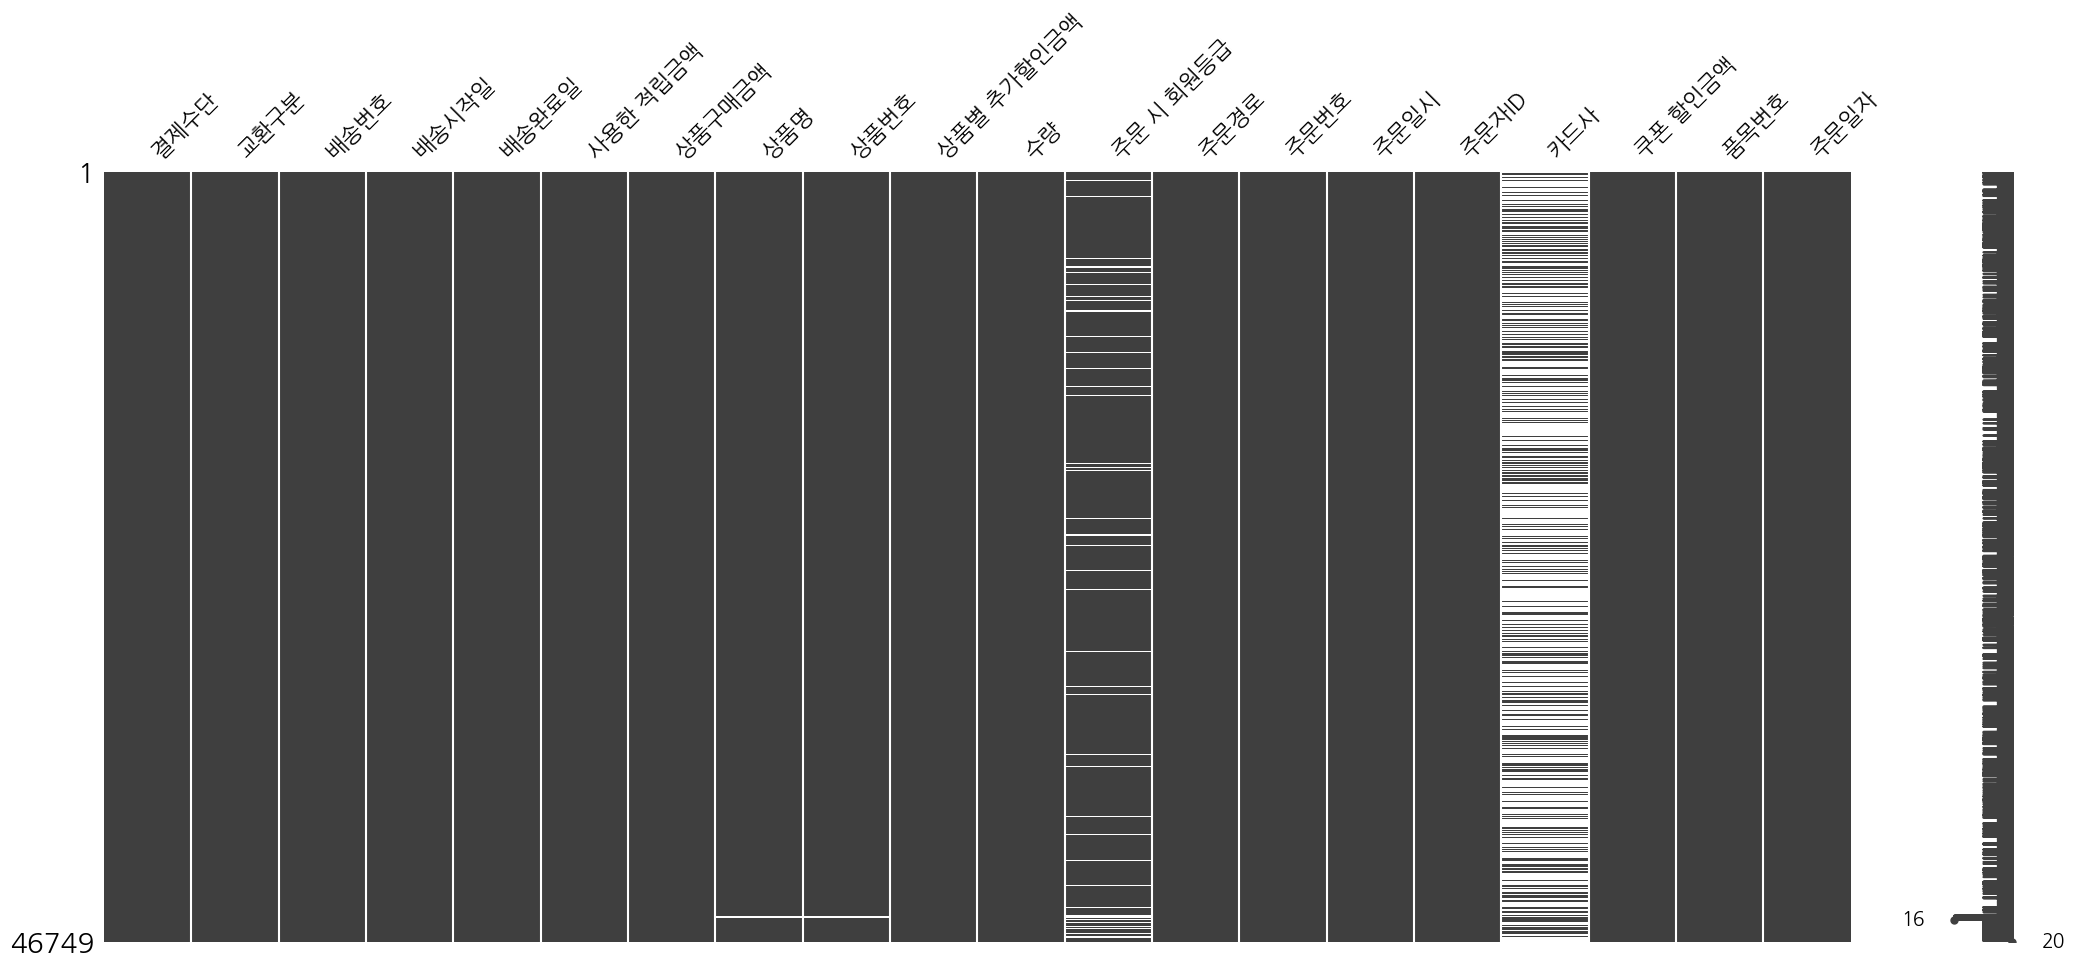

In [80]:
# 결측치가 어떻게 분포되어있는가?
msno.matrix(df)

<Axes: >

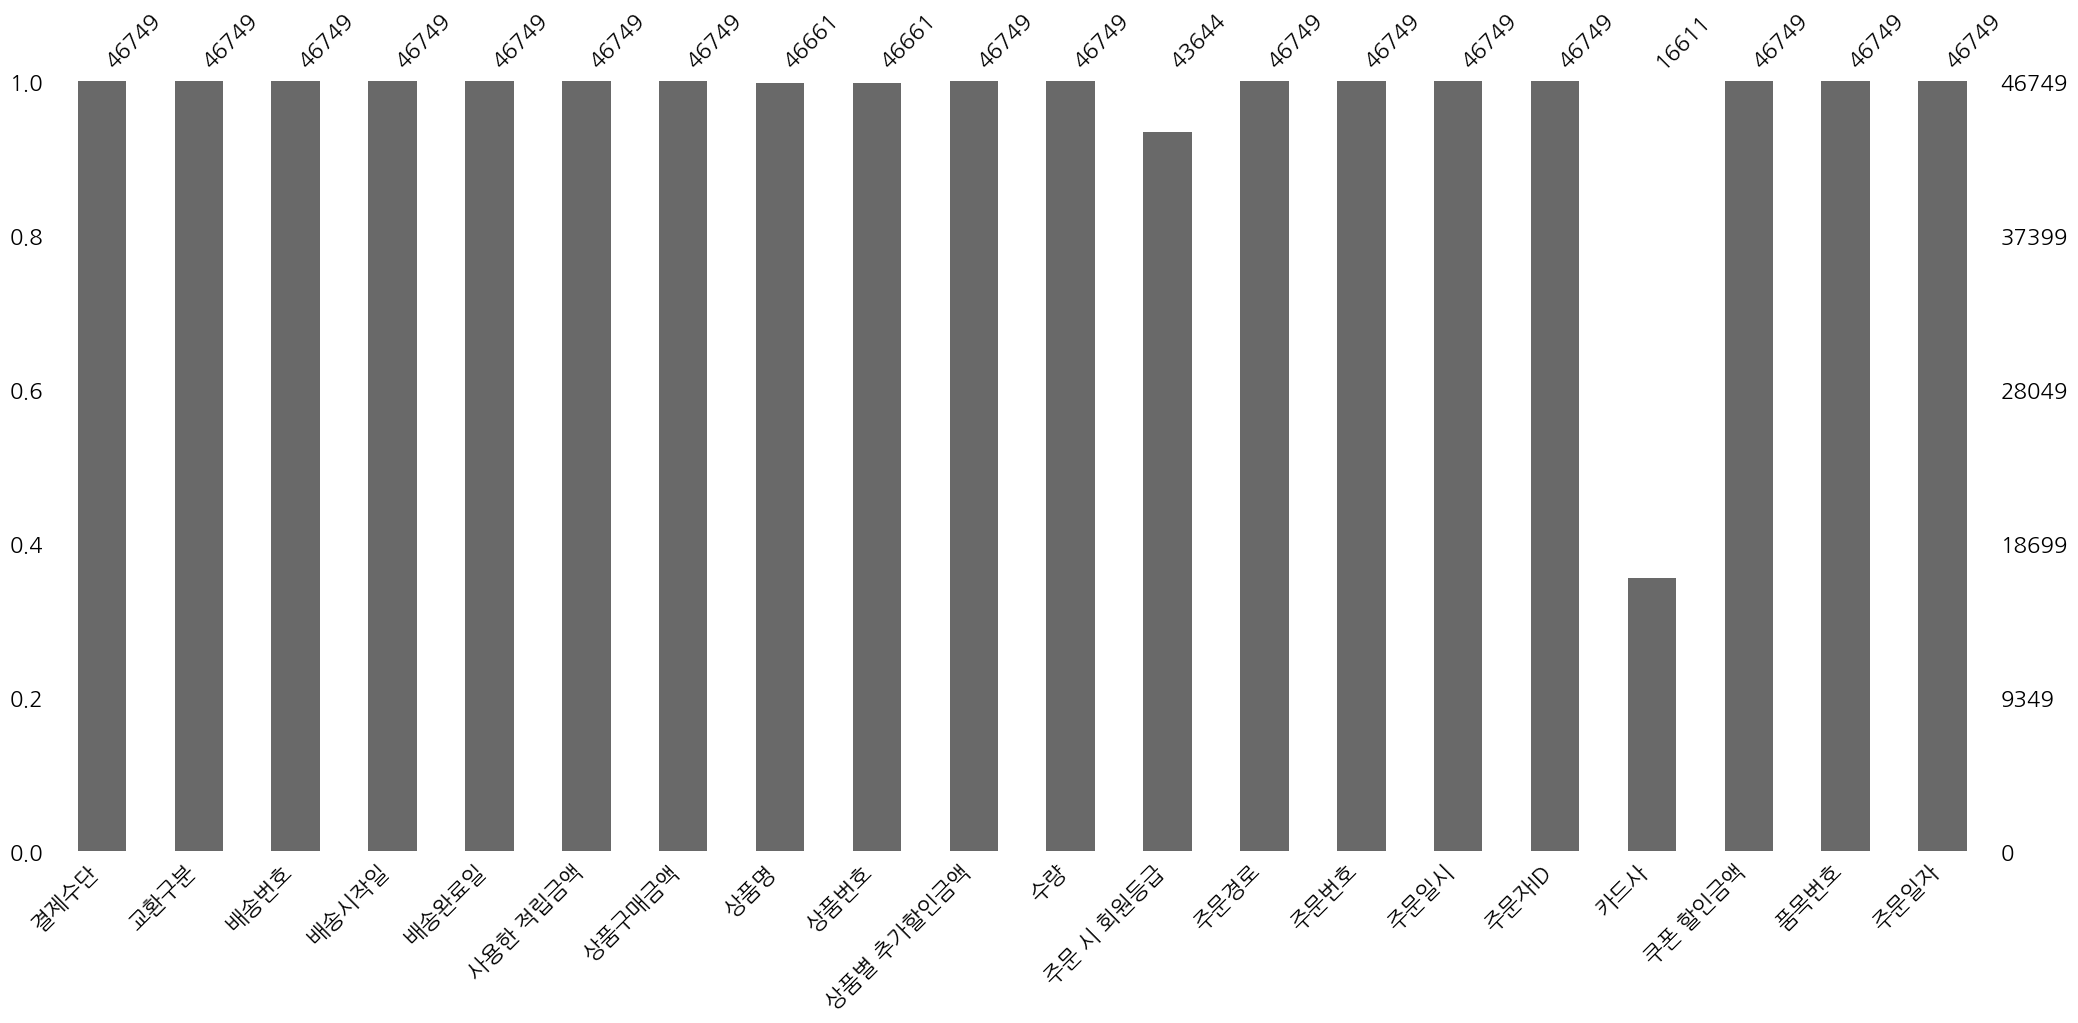

In [81]:
msno.bar(df)

<Axes: >

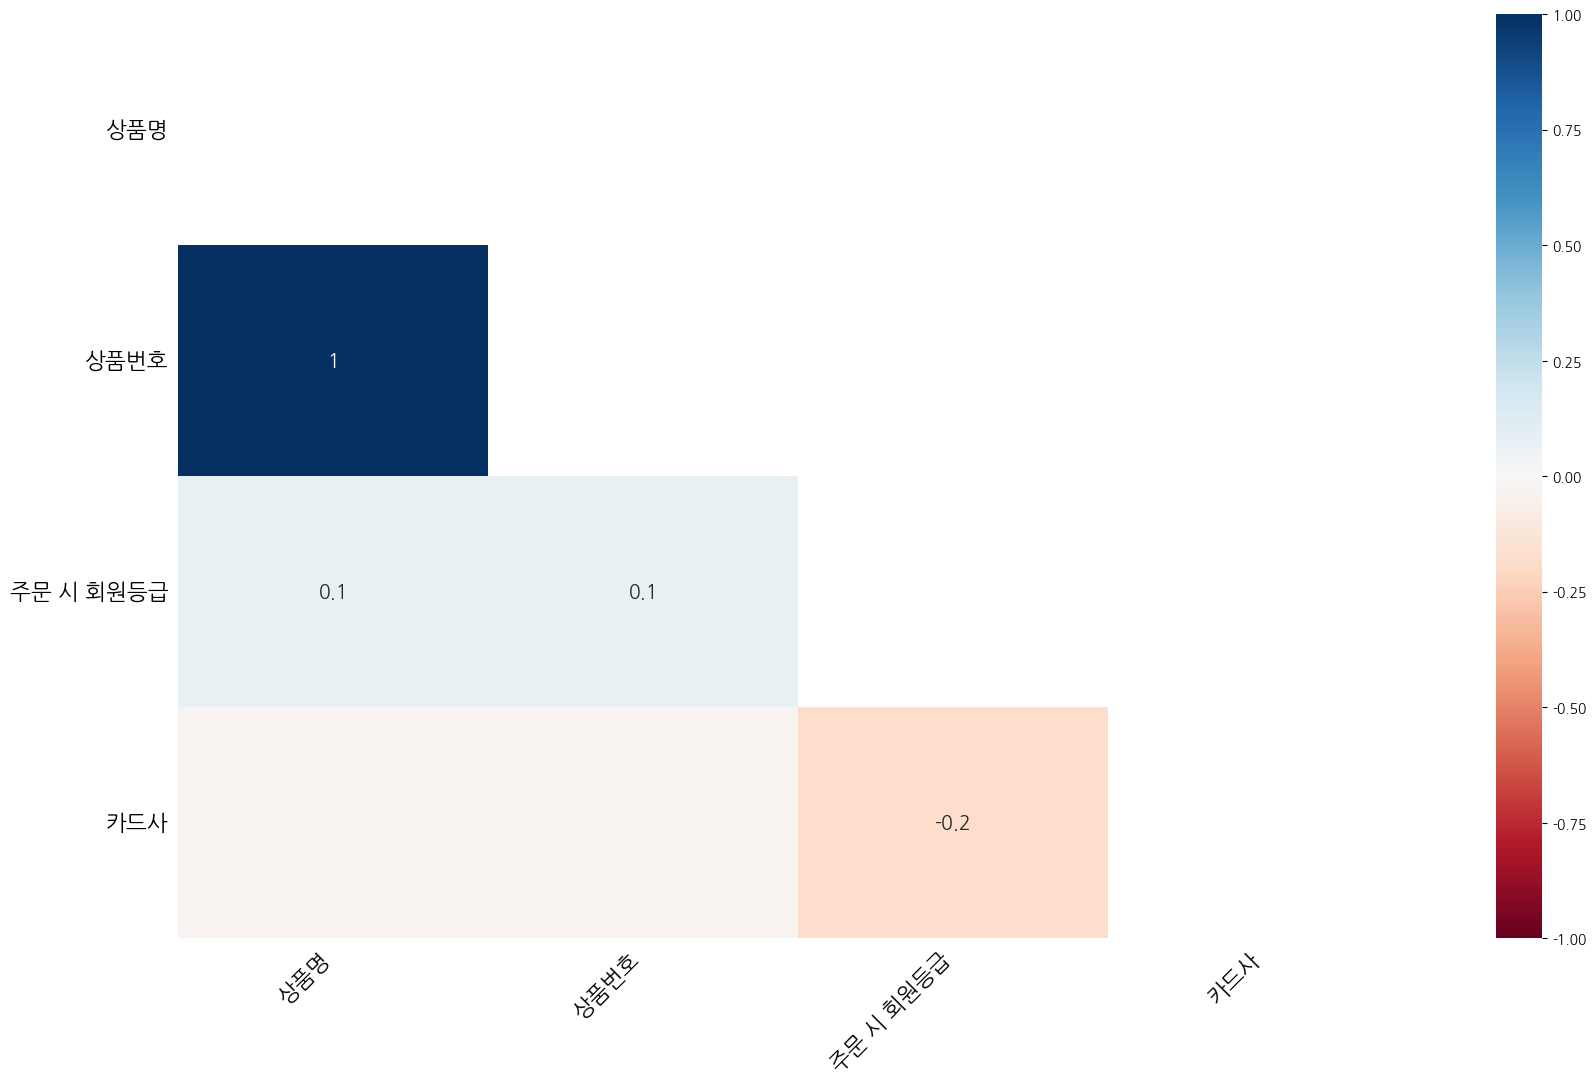

In [82]:
# 누락값에 대한 상관관계
msno.heatmap(df)

<Axes: >

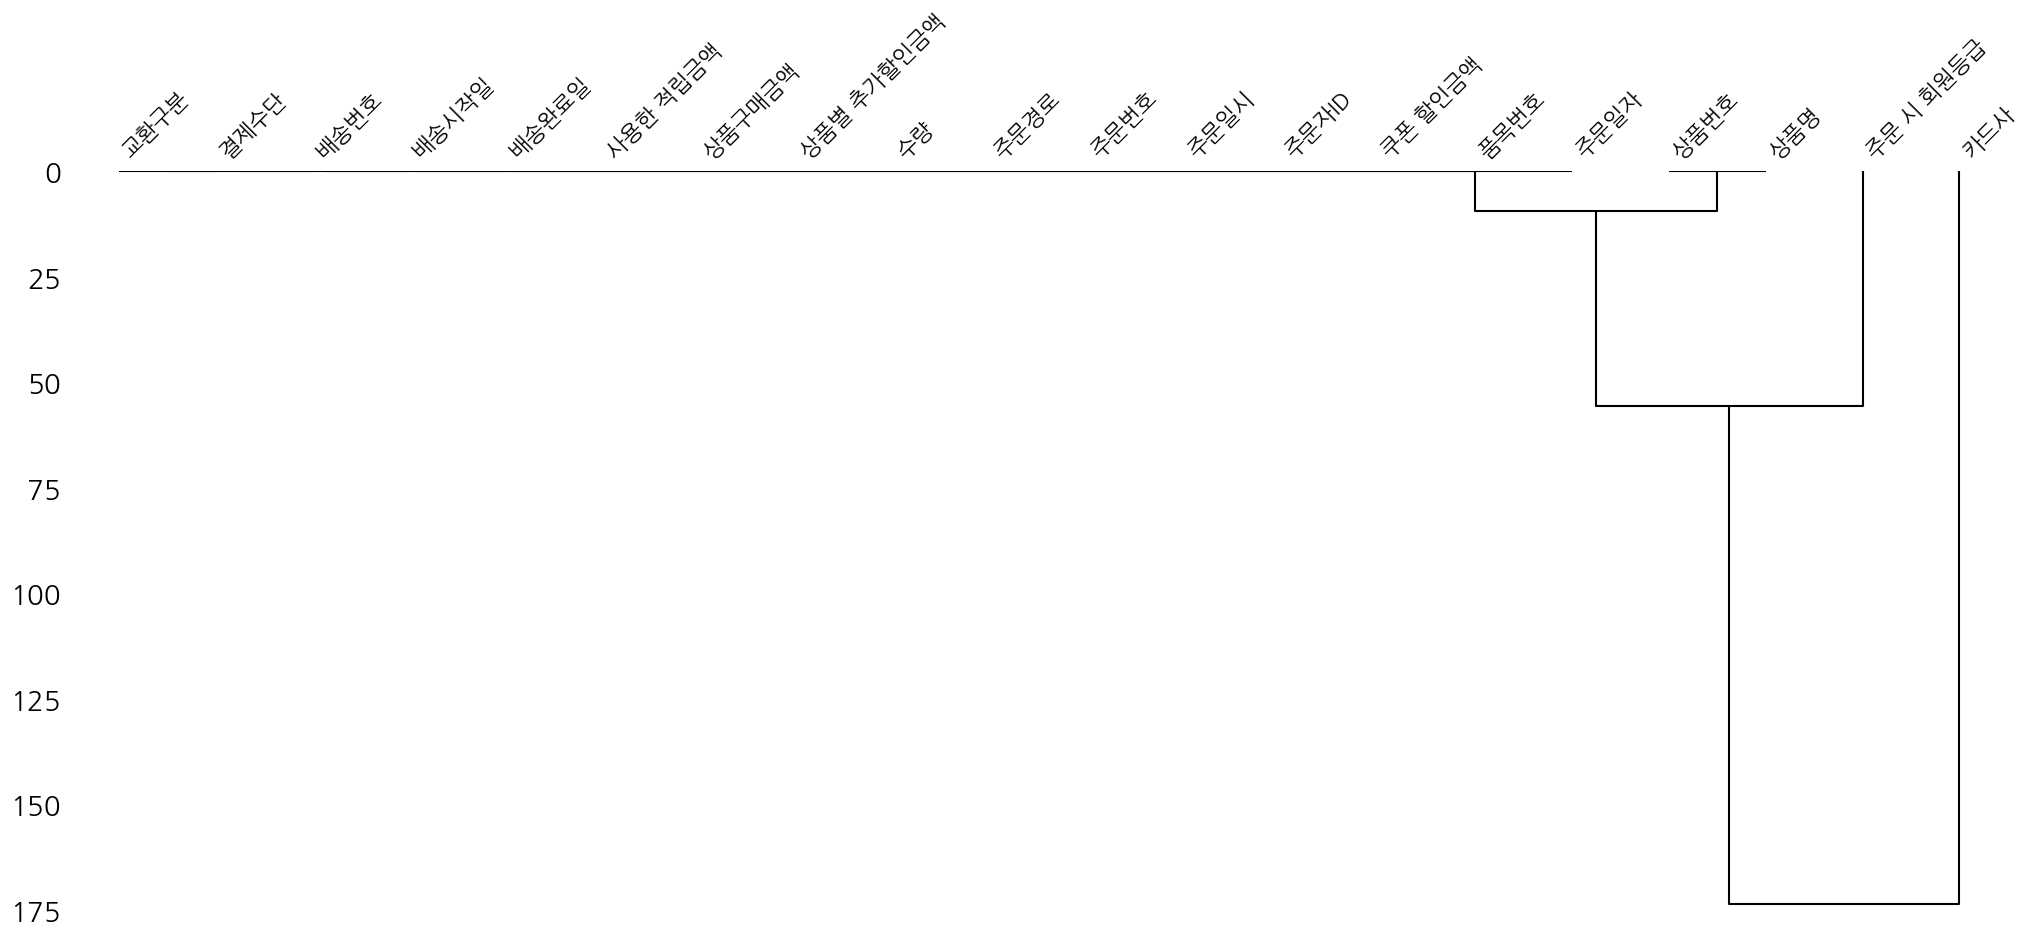

In [83]:
msno.dendrogram(df)

In [88]:
# 일자별 판매량 계산
p1 = df.pivot_table(index='주문일자', 
              values=['사용한 적립금액','상품구매금액','수량'],
              aggfunc='sum')
p1 = p1.sort_index()
p1

,사용한 적립금액,상품구매금액,수량
주문일자,,,
2017-01-01,0,66500,1
2017-01-15,0,17000,1
2017-01-18,0,73700,1
2017-01-23,0,17000,1
2017-02-02,0,72000,1
...,...,...,...
2019-05-31,38400,5677220,88
2019-06-01,0,98600,1
2019-06-02,0,267370,5


In [89]:
# sum으로 표현해도 되는데 누락값으로 나타내기 위해서 mean으로 확인했슈
p2 = p1.resample("1D").mean()
p2

,사용한 적립금액,상품구매금액,수량
주문일자,,,
2017-01-01,0.0,66500.0,1.0
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN
...,...,...,...
2019-06-15,NaN,NaN,NaN
2019-06-16,NaN,NaN,NaN
2019-06-17,NaN,NaN,NaN


<Axes: >

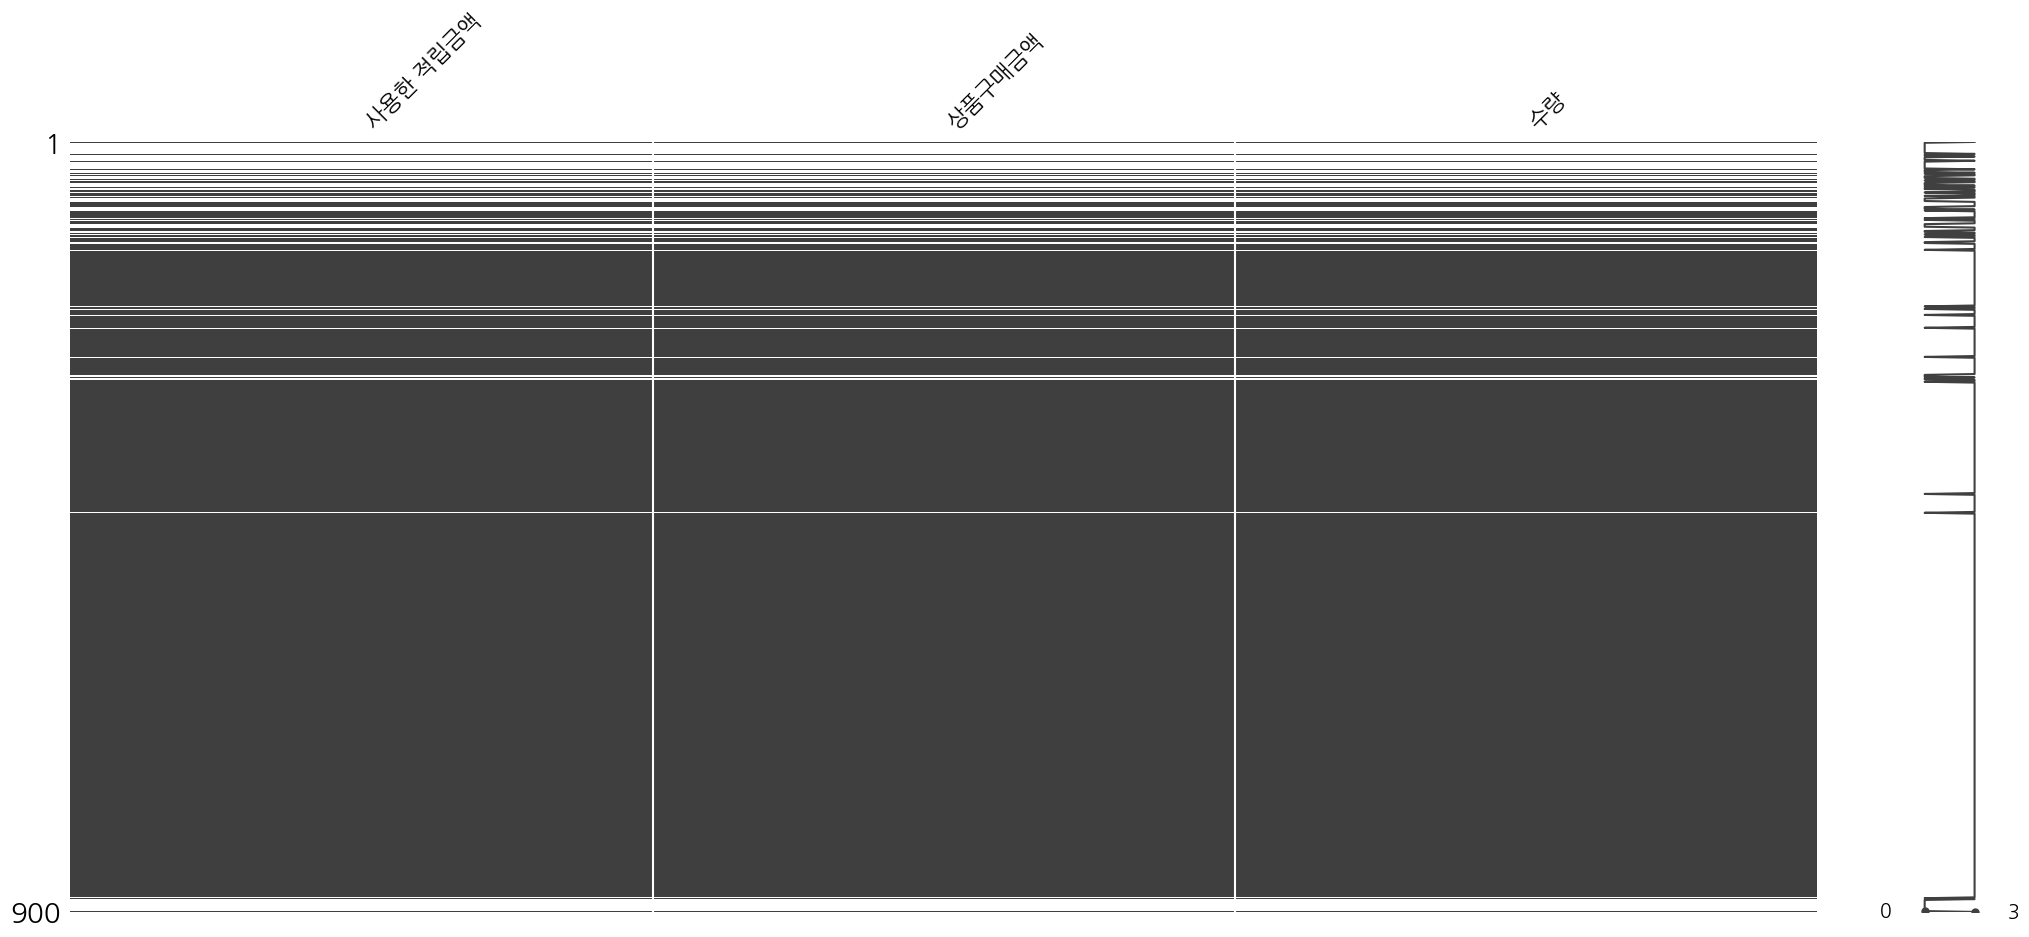

In [90]:
msno.matrix(p2)

### RFM 분석
Recency (최근성) , Frequency (빈도), Monetary(금액)
* 고객 세분화 마케팅 기법
1. 최근성 : 고객이 마지막으로 구매한 시점 (오늘날짜 - 마지막 구매날짜)
2. 빈도 : 고객이 특정 기간 동안 얼마나 자주 구매하는지 (특정 기간 구매 횟수)
3. 금액 : 고객이 특정 기간 동안 얼마나 많은 금액을 지출했는지 (지출한 총 금액)

In [123]:
# 최근성
a = max(df['주문일자']) - df['주문일자']
df['Recency']=a.dt.days
df.head(3)

,결제수단,교환구분,배송번호,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,...,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,품목번호,주문일자,Recency,Frequency
0,무통장입금,교환안함,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,...,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,0V00A1,NaN,0,42602,2018-12-27,174,1
1,무통장입금,교환안함,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,...,모바일웹,20181229-0000119,2018-12-29 오후 1:22,1V00A1,NaN,0,42930,2018-12-29,172,1
2,무통장입금,교환안함,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271.0,2900,...,모바일웹,20181230-0000100,2018-12-30 오후 3:15,2V00A1,NaN,0,42998,2018-12-30,171,1


In [124]:
# 가장 최근의 값을 구하기 위해서 min이 될거당!
# 주문자의 가장 최근 방문일 구할 수 있음
p0 = df.pivot_table(index='주문자ID',values='Recency',aggfunc='min').reset_index()
p0

,주문자ID,Recency
0,0V00A1,30
1,1000V00A1,59
2,1001V00A1,30
3,1002V00A1,142
4,1003V00A1,142
...,...,...
4952,997V00A1,112
4953,998V00A1,142
4954,999V00A1,22
4955,99V00A1,34


In [125]:
# 빈도 계산
df['Frequency']=1

In [131]:
# 주문자가 주문일자에 매장을 몇 번왔는지
p1 = df.pivot_table(index=['주문자ID', '주문일자'], values='Frequency', aggfunc='sum').reset_index()
p1

,주문자ID,주문일자,Frequency
0,0V00A1,2018-08-21,3
1,0V00A1,2018-12-27,1
2,0V00A1,2019-02-22,2
3,0V00A1,2019-03-19,1
4,0V00A1,2019-03-29,1
...,...,...,...
21108,99V00A1,2019-01-30,2
21109,99V00A1,2019-03-22,1
21110,99V00A1,2019-05-16,1
21111,9V00A1,2018-12-31,1


In [132]:
# 주문자가 매장에 총 몇 번 왔는지
p2 = df.pivot_table(index = "주문자ID",values = "Frequency", aggfunc="sum").reset_index()

p2

,주문자ID,Frequency
0,0V00A1,11
1,1000V00A1,36
2,1001V00A1,6
3,1002V00A1,2
4,1003V00A1,1
...,...,...
4952,997V00A1,8
4953,998V00A1,3
4954,999V00A1,3
4955,99V00A1,18


In [133]:
# 총 금액
# 주문자별로 그 매장에서 얼마 썼는지 알 수 있음
p3 = df.pivot_table(index='주문자ID', values='상품구매금액',aggfunc='sum').reset_index()
p3

,주문자ID,상품구매금액
0,0V00A1,678340
1,1000V00A1,2864100
2,1001V00A1,468910
3,1002V00A1,260040
4,1003V00A1,96000
...,...,...
4952,997V00A1,772410
4953,998V00A1,281490
4954,999V00A1,203710
4955,99V00A1,880120


In [134]:
m1 = p0.merge(p2, on='주문자ID')
m1

,주문자ID,Recency,Frequency
0,0V00A1,30,11
1,1000V00A1,59,36
2,1001V00A1,30,6
3,1002V00A1,142,2
4,1003V00A1,142,1
...,...,...,...
4952,997V00A1,112,8
4953,998V00A1,142,3
4954,999V00A1,22,3
4955,99V00A1,34,18


In [135]:
m2 = m1.merge(p3,on='주문자ID')
m3 = m2.rename(columns={"상품구매금액": "Monetary"})
m3

,주문자ID,Recency,Frequency,Monetary
0,0V00A1,30,11,678340
1,1000V00A1,59,36,2864100
2,1001V00A1,30,6,468910
3,1002V00A1,142,2,260040
4,1003V00A1,142,1,96000
...,...,...,...,...
4952,997V00A1,112,8,772410
4953,998V00A1,142,3,281490
4954,999V00A1,22,3,203710
4955,99V00A1,34,18,880120


In [136]:
# RFM
m3['Total'] = m3['Recency']*0.3 + m3['Frequency']*0.2 + m3['Monetary']*0.5
m3

,주문자ID,Recency,Frequency,Monetary,Total
0,0V00A1,30,11,678340,339181.2
1,1000V00A1,59,36,2864100,1432074.9
2,1001V00A1,30,6,468910,234465.2
3,1002V00A1,142,2,260040,130063.0
4,1003V00A1,142,1,96000,48042.8
...,...,...,...,...,...
4952,997V00A1,112,8,772410,386240.2
4953,998V00A1,142,3,281490,140788.2
4954,999V00A1,22,3,203710,101862.2
4955,99V00A1,34,18,880120,440073.8


In [137]:
def func(x):
    value = m3['Total']
    if x>= value.quantile(0.9):
        return "A"
    elif x>=value.quantile(0.7):
        return 'B'
    elif x>= value.quantile(0.5):
        return 'C'
    return 'D'

m3['Rank'] = m3['Total'].apply(func)
m3

,주문자ID,Recency,Frequency,Monetary,Total,Rank
0,0V00A1,30,11,678340,339181.2,B
1,1000V00A1,59,36,2864100,1432074.9,A
2,1001V00A1,30,6,468910,234465.2,B
3,1002V00A1,142,2,260040,130063.0,C
4,1003V00A1,142,1,96000,48042.8,D
...,...,...,...,...,...,...
4952,997V00A1,112,8,772410,386240.2,B
4953,998V00A1,142,3,281490,140788.2,C
4954,999V00A1,22,3,203710,101862.2,C
4955,99V00A1,34,18,880120,440073.8,B


In [138]:
m3['Rank'].value_counts()

Rank
D    2478
C     992
B     991
A     496
Name: count, dtype: int64

In [139]:
# 고객의 특성을 나타내는 파일
df2 = pd.read_csv('실습 파일/10_Data.csv')
del df2['Unnamed: 0']
df2

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1
4,40,남자,2018-12-19 오후 1:26,SNS광고,모바일,2017-01-17,사업자,사업자,4V00A1
...,...,...,...,...,...,...,...,...,...
6570,31,남자,2019-05-31 오후 4:38,유튜브광고,PC,2019-05-31,개인,전화주문 고객,pp1730
6571,45,남자,2019-06-21 오후 9:38,전단지광고,PC,2019-06-05,사업자,일반,jsuee8228
6572,47,남자,2019-06-12 오후 7:59,인터넷검색,모바일,2019-06-12,사업자,일반,aaok0204
6573,46,남자,2019-06-19 오전 10:59,인터넷검색,모바일,2019-06-19,사업자,일반,aaok02044


In [141]:
df3 = df2.merge(m3, on='주문자ID')
df3

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30,11,678340,339181.2,B
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153,10,799920,400007.9,B
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18,3105,247597550,123799401.4,A
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1,23,24,2826660,1413341.7,A
4,40,남자,2018-12-19 오후 1:26,SNS광고,모바일,2017-01-17,사업자,사업자,4V00A1,28,45,2785020,1392527.4,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,42,남자,2019-04-17 오후 2:17,잡지광고,PC,2019-02-07,사업자,사업자,4952V00A1,540,7,155780,78053.4,D
4953,44,남자,2019-02-09 오전 12:01,전단지광고,모바일,2019-02-07,사업자,사업자,4953V00A1,539,1,52800,26561.9,D
4954,35,남자,2019-04-14 오후 2:27,잡지광고,모바일,2019-02-07,사업자,사업자,4954V00A1,539,2,79200,39762.1,D
4955,24,남자,2019-05-29 오전 10:20,지인추천,모바일,2019-02-07,사업자,사업자,4955V00A1,537,2,86240,43281.5,D


In [142]:
df4 = pd.crosstab(index=df3['성별'], columns=df3['Rank'])
df4

Rank,A,B,C,D
성별,,,,
남자,378,878,927,2306
여자,118,113,65,172


In [143]:
# 범주형 데이터라서 정규성을 검정하지 않는데,
# 지금 데이터는 상품이 들어오는 순서(고객의 방문 순서)에 대해서
# 추가되는 것 자체가 랜덤하게 쌓여지는 데이터이기 때문에,
# 독립적인 사람의 행동으로 발생한 데이터이기 때문에

#귀무가설 : 등급과 성별은 서로 연관이 없다
# 대립가설 : 등급과 성별은 서로 연관이 있다.

stats.chi2_contingency(df4)
# 등급에 따라 성별이 다르다고 볼 수 있다.

Chi2ContingencyResult(statistic=151.7045919766828, pvalue=1.1299021087760505e-32, dof=3, expected_freq=array([[ 449.17167642,  897.43776478,  898.34335283, 2244.04720597],
       [  46.82832358,   93.56223522,   93.65664717,  233.95279403]]))

In [145]:
df5 = df4.T
df5

성별,남자,여자
Rank,,
A,378,118
B,878,113
C,927,65
D,2306,172


In [146]:
# A 상위 10%에 해당하는 여성 고객이 다른 그룹에 비해 많다고 볼 수 있다.
# 23% 있다는 의미니깐
df6 = df5['여자']/(df5['남자']+df5['여자'])
df6

Rank
A    0.237903
B    0.114026
C    0.065524
D    0.069411
dtype: float64

In [150]:
df3.to_csv("실습 파일/11_Data.csv", index=False)
df3.to_csv("실습 파일/09_Data_df3.csv", index=False)
df3

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30,11,678340,339181.2,B
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153,10,799920,400007.9,B
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18,3105,247597550,123799401.4,A
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1,23,24,2826660,1413341.7,A
4,40,남자,2018-12-19 오후 1:26,SNS광고,모바일,2017-01-17,사업자,사업자,4V00A1,28,45,2785020,1392527.4,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,42,남자,2019-04-17 오후 2:17,잡지광고,PC,2019-02-07,사업자,사업자,4952V00A1,540,7,155780,78053.4,D
4953,44,남자,2019-02-09 오전 12:01,전단지광고,모바일,2019-02-07,사업자,사업자,4953V00A1,539,1,52800,26561.9,D
4954,35,남자,2019-04-14 오후 2:27,잡지광고,모바일,2019-02-07,사업자,사업자,4954V00A1,539,2,79200,39762.1,D
4955,24,남자,2019-05-29 오전 10:20,지인추천,모바일,2019-02-07,사업자,사업자,4955V00A1,537,2,86240,43281.5,D
